# OPTIMAL TAX ON BUSINESS

## Load files and packages


In [61]:
using CSV, DataFrames, Statistics, Plots, PrettyTables
include("OCModelE.jl")
include("OCModelE_transition.jl")  # defines compute_FO_transition_path


compute_FO_transition_path (generic function with 2 methods)

## Read CSVs

In [62]:

# Set path and load data
path = "/Users/bhandari/Dropbox/optimal_business_taxation/noncompliance/Approximation Code/"
cd(path)
df = CSV.read(path*"grid_results_with_values.csv", DataFrame)

# # run the part below if u want to have just ran a new set of cases
# files = filter(f -> occursin(r"^case_\d+\.\d+_\d+\.\d+\.csv$", f), readdir(path))

# # Read all matching files into a vector of DataFrames
# dfs = [CSV.read(joinpath(path, file), DataFrame) for file in files]

# # Optionally, combine into a single DataFrame (if same structure)
# df= vcat(dfs...)
# CSV.write("grid_results_with_values.csv", df)



Row,τb,τw,r,tr,diffv,diffasset,diffgbc,Rss,Wss,Trss,Frac_bss,Vss,Ass,Css,value
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.21,0.4,0.041703,0.632477,0.0112245,6.29115e-6,-1.48999e-6,1.0417,1.15391,0.632477,0.231139,-70.0105,13.1557,1.72836,-70.0196
2,0.27,0.4,0.0418635,0.663868,0.000258416,8.03053e-5,-1.91735e-5,1.04186,1.15119,0.663868,0.21334,-69.684,13.2318,1.74366,-69.7456
3,0.33,0.4,0.0420005,0.69286,9.697e-5,5.07099e-5,-1.2977e-5,1.042,1.14888,0.69286,0.195387,-69.398,13.3033,1.75759,-69.5048
4,0.39,0.4,0.0421176,0.718921,9.68795e-5,3.25823e-5,-8.88169e-6,1.04212,1.14691,0.718921,0.177338,-69.1614,13.3683,1.76958,-69.3042
5,0.45,0.4,0.0422203,0.74187,9.65011e-5,1.39797e-5,-4.18239e-6,1.04222,1.14519,0.74187,0.158764,-68.9752,13.4269,1.77946,-69.1445
6,0.51,0.4,0.0423162,0.761392,0.0241499,8.76758e-6,-2.35304e-6,1.04232,1.14359,0.761392,0.139258,-68.8423,13.4806,1.78713,-69.0266
7,0.57,0.4,0.0424171,0.776845,0.0953649,2.29222e-5,2.23823e-5,1.04242,1.14191,0.776845,0.118708,-68.7728,13.5292,1.79223,-68.9572
8,0.63,0.4,0.0425301,0.787481,0.00144874,2.0427e-5,-1.31054e-5,1.04253,1.14003,0.787481,0.0972779,-68.7769,13.5757,1.79448,-68.9451
9,0.69,0.4,0.0426477,0.792747,9.65396e-5,1.093e-5,-2.91275e-5,1.04265,1.13808,0.792747,0.0759409,-68.857,13.6214,1.79393,-69.0009


In [63]:
# df = filter(:value => x -> !isnan(x), df)

# df.ratioV=abs.(df.value./df.Vss .-1)
# # truncate on outliers
# mean(df.ratioV)

# sel= (df.ratioV .<.max(df.ratioV))
# df=df[sel, :]




## Plot optimal $\tau_{b}$

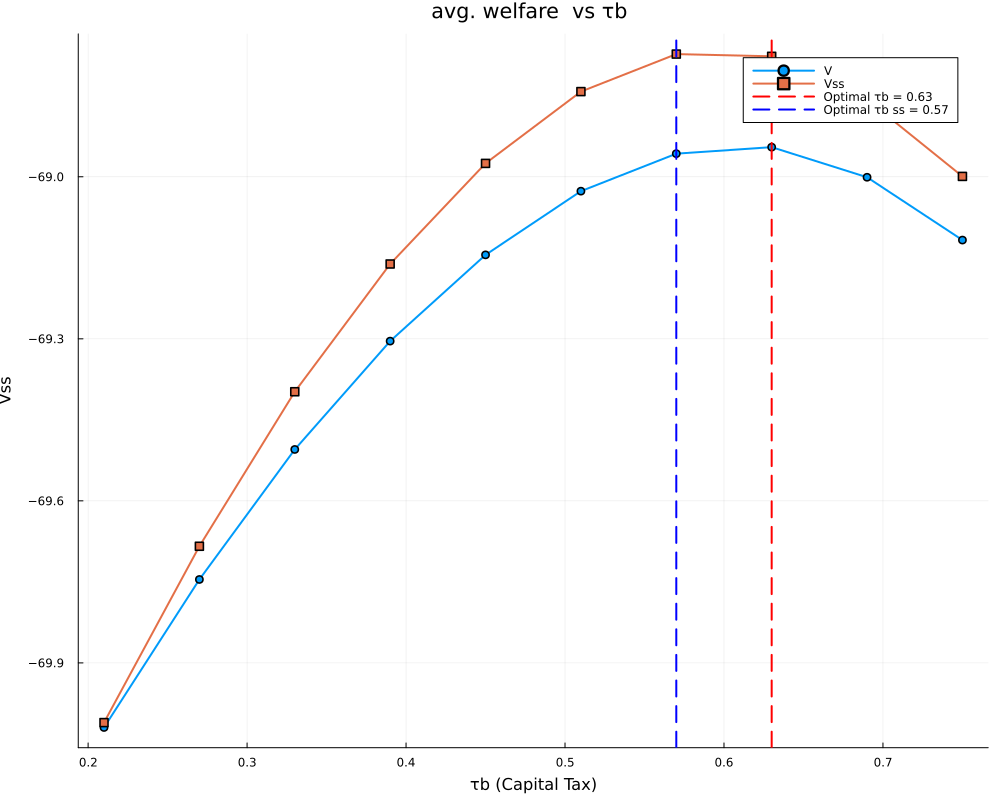

In [64]:

function plot_value_vs_taub(df)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]


    # Find τb with maximum value
    idx_max_ss = argmax(df_sub.Vss)
    best_taub_ss = df_sub[idx_max_ss, :τb]
    best_val_ss = df_sub[idx_max_ss, :Vss]


    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub.value,
         marker = :circle, label = "V",
         xlabel = "τb (Capital Tax)", ylabel = "V",
         title = "avg. welfare  vs τb ", grid = true)
        # Plot value vs τb and vertical line
        plot!(df_sub.τb, df_sub.Vss,
        marker = :square, label = "Vss",
        xlabel = "τb (Capital Tax)", ylabel = "Vss",
        title = "avg. welfare  vs τb ", grid = true)
    
    vline!([best_taub], linestyle = :dash, color = :red, label = "Optimal τb = $(round(best_taub, digits=2))")
    vline!([best_taub_ss], linestyle = :dash, color = :blue, label = "Optimal τb ss = $(round(best_taub_ss, digits=2))")

end

# Example usage
plot_value_vs_taub(df)


df_sub = filter(:value => x -> !isnan(x), df)


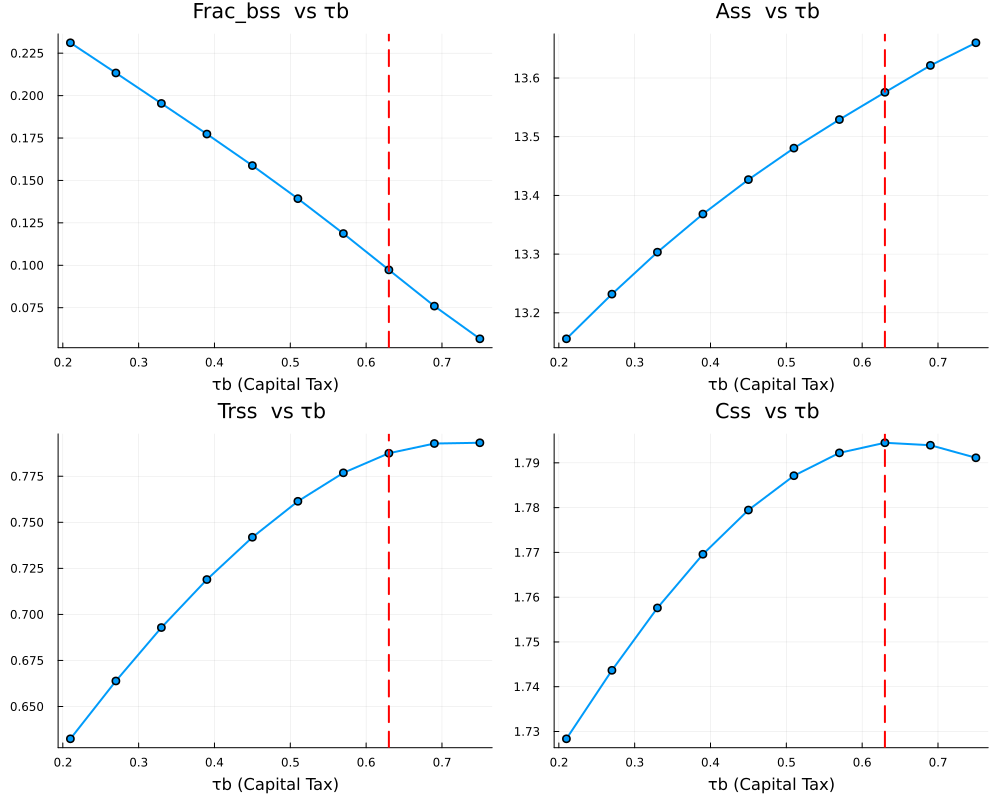

In [65]:

function plot_col_vs_taub(df,col)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]



    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub[!,col],
         marker = :circle, label=false,
         xlabel = "τb (Capital Tax)",
         title = "$(col)  vs τb ", grid = true)
    vline!([best_taub], linestyle = :dash, color = :red,label=false)

end

# Example usage
p1=plot_col_vs_taub(df,:Frac_bss)
p2=plot_col_vs_taub(df,:Ass)
p3=plot_col_vs_taub(df,:Trss)
p4=plot_col_vs_taub(df,:Css)
plot(p1,p2,p3,p4)


In [67]:
df_sub = filter(:value => x -> !isnan(x), df)
sort!(df_sub, :τb)
# Find τb with maximum value
idx_max = argmax(df_sub.value)
τb_val = df_sub[idx_max,:τb]
τw_val = df_sub[idx_max,:τw]
df_trans,sol,OCM_,OCM = compute_FO_transition_path(τb_val, τw_val);


setting up the initial ss...
      Using bisection method
      Using newton method
      Interest rate       4.17, Govt transfer       0.63
      Asset market   5.559e-06, Govt budget   -1.261e-06

....done
                    OC Model Results

      Case Parameters
    -------------------------------------------
      τᵇ (Capital tax)           0.20
      τʷ (Labor tax)             0.40
      χ  (max leverage parameter)   2.00

      Equilibrium values and residuals
    -------------------------------------------
      Interest rate             4.17%
      Government transfer       0.63
      Asset market residual     5.56e-06
      Government budget        -1.26e-06


      Incomes (%GDP)            Products             
    -------------------------------------------------
      Sweat            11.9  |  Consumption      67.4
      Compensation     44.4  |  Investment       26.7
      Capital income   43.7  |  Defense           5.9
    ----------------------------------------------

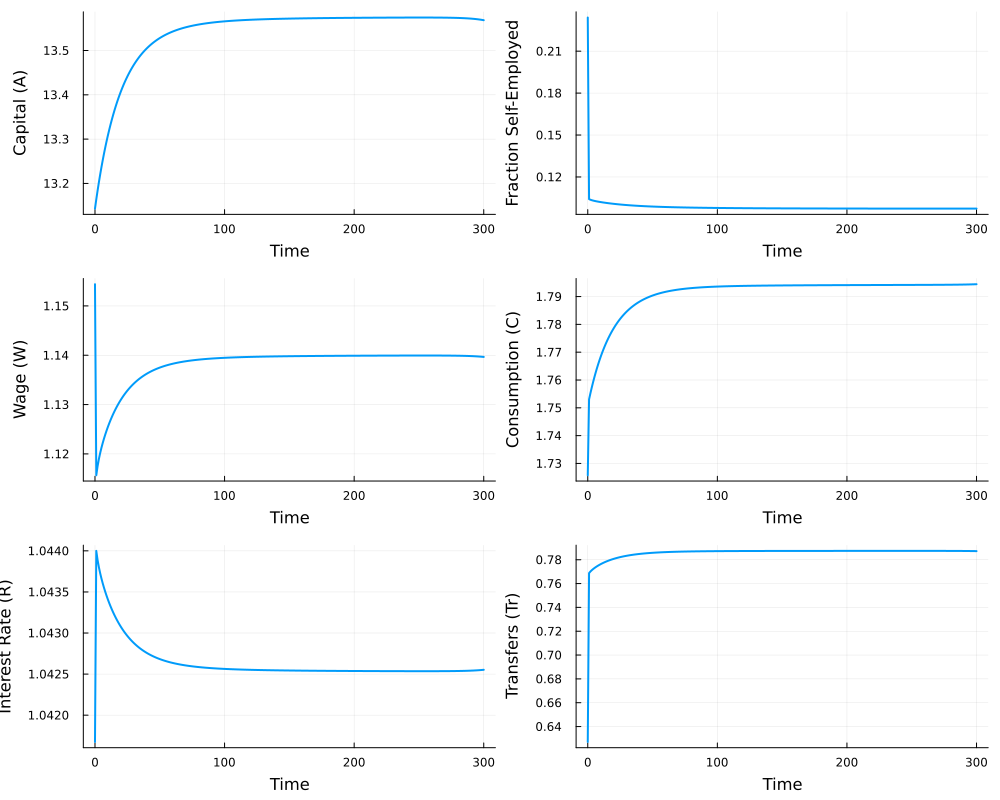

In [69]:


# Set defaults
default(linewidth = 2, size = (1000, 800), legend = :topright)

# Individual plots
p1 = plot(df_trans.t, df_trans.A,       ylabel = "Capital (A)",            xlabel = "Time", label = "")
p2 = plot(df_trans.t, df_trans.Frac_b,  ylabel = "Fraction Self-Employed", xlabel = "Time", label = "")
p3 = plot(df_trans.t, df_trans.W,       ylabel = "Wage (W)",                xlabel = "Time", label = "")
p4 = plot(df_trans.t, df_trans.C,       ylabel = "Consumption (C)",         xlabel = "Time", label = "")
p5 = plot(df_trans.t, df_trans.R,       ylabel = "Interest Rate (R)",       xlabel = "Time", label = "")
p6 = plot(df_trans.t, df_trans.Tr,      ylabel = "Transfers (Tr)",          xlabel = "Time", label = "")

# Combine into 3×2 layout without subplot titles
plot(p1, p2, p3, p4, p5, p6, layout = (3, 2))
